<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-07 12:16:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  62.8MB/s    in 3.2s    

2025-09-07 12:16:32 (63.1 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


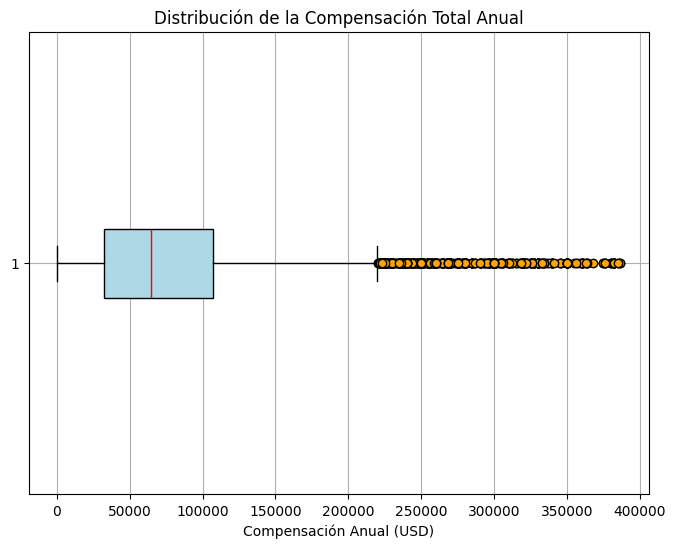

In [8]:
# Extraer la columna de compensación total
query = "SELECT ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)

# Eliminar valores nulos
df = df.dropna()

# Filtrar valores extremos para evitar distorsión visual
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Graficar el box plot
plt.figure(figsize=(8,6))
plt.boxplot(df['ConvertedCompYearly'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

plt.title('Distribución de la Compensación Total Anual')
plt.xlabel('Compensación Anual (USD)')
plt.grid(True)
plt.show()



**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


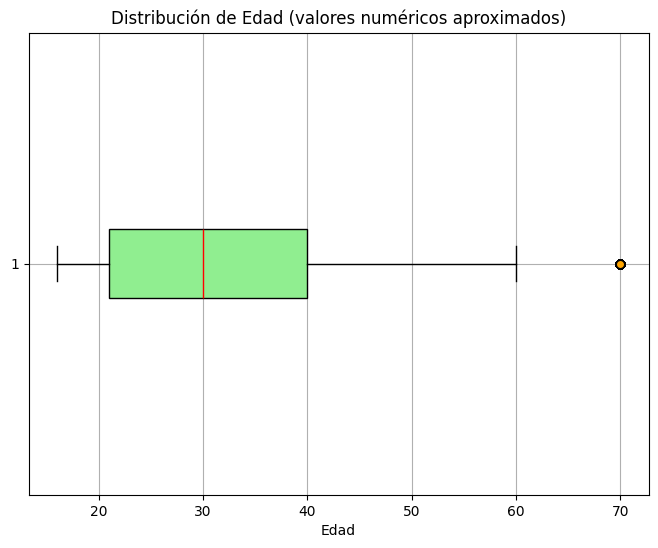

In [9]:
# Extraer la columna Age
query = "SELECT Age FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Convertir rangos de edad a valores numéricos representativos
def convertir_edad(valor):
    mapa = {
        'Under 18 years old': 16,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65 years or older': 70,
        'Prefer not to say': None
    }
    return mapa.get(valor, None)

df['EdadNum'] = df['Age'].apply(convertir_edad)
df = df.dropna(subset=['EdadNum'])

# Graficar el box plot
plt.figure(figsize=(8,6))
plt.boxplot(df['EdadNum'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

plt.title('Distribución de Edad (valores numéricos aproximados)')
plt.xlabel('Edad')
plt.grid(True)
plt.show()



### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1000x600 with 0 Axes>

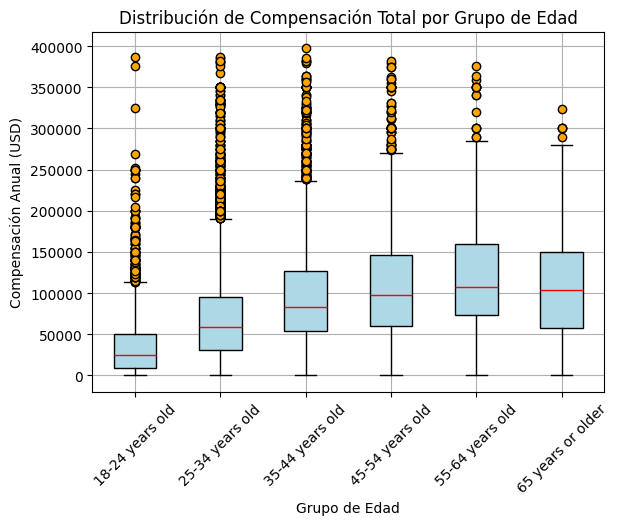

In [10]:
# Extraer las columnas necesarias
query = "SELECT Age, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Filtrar grupos válidos de edad
grupos_edad = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(grupos_edad)]

# Filtrar valores extremos de compensación para evitar distorsión visual
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Graficar el box plot
plt.figure(figsize=(10,6))
df.boxplot(column='ConvertedCompYearly', by='Age', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

plt.title('Distribución de Compensación Total por Grupo de Edad')
plt.suptitle('')  # Elimina el título automático de pandas
plt.xlabel('Grupo de Edad')
plt.ylabel('Compensación Anual (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [12]:
# Extraer la columna JobSatPoints_6
query = "SELECT JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)

# Eliminar valores nulos
df = df.dropna()

# Mostrar los valores únicos ordenados
valores_unicos = sorted(df['JobSatPoints_6'].unique())
print("Valores únicos de JobSatPoints_6:")
print(valores_unicos)


Valores únicos de JobSatPoints_6:
[np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(6.25), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(12.5), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(17.5), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(33.3), np.float64(33.33), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(48.0), np.float64(49.0), np.float64(50.0), np

<Figure size 1000x600 with 0 Axes>

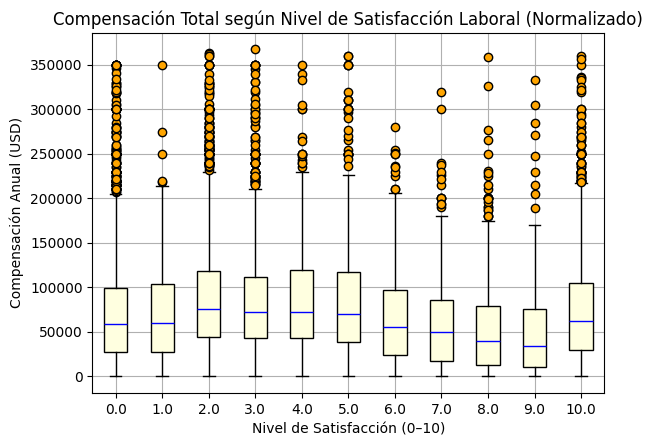

In [13]:
# Extraer columnas necesarias
query = "SELECT JobSatPoints_6, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Filtrar compensaciones extremas
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Normalizar JobSatPoints_6 a escala 0–10
df['JobSatNorm'] = df['JobSatPoints_6'].apply(lambda x: x if x <= 10 else x / 10)

# Redondear para agrupar
df['JobSatNorm'] = df['JobSatNorm'].round()

# Graficar boxplot
plt.figure(figsize=(10,6))
df.boxplot(column='ConvertedCompYearly', by='JobSatNorm', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightyellow', color='black'),
           medianprops=dict(color='blue'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

plt.title('Compensación Total según Nivel de Satisfacción Laboral (Normalizado)')
plt.suptitle('')
plt.xlabel('Nivel de Satisfacción (0–10)')
plt.ylabel('Compensación Anual (USD)')
plt.grid(True)
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

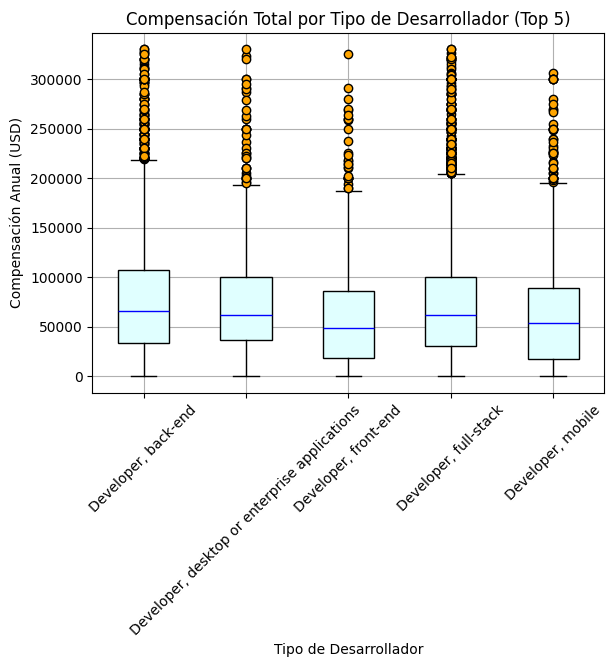

In [15]:
# Extraer columnas necesarias
query = "SELECT DevType, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Separar múltiples roles (asumiendo que están separados por ';')
df['DevType'] = df['DevType'].str.split(';')
df_exploded = df.explode('DevType')

# Obtener los 5 tipos de desarrollador más frecuentes
top5_roles = df_exploded['DevType'].value_counts().head(5).index.tolist()

# Filtrar solo esos 5 tipos
df_top5 = df_exploded[df_exploded['DevType'].isin(top5_roles)]

# Filtrar compensaciones extremas para evitar distorsión visual
df_top5 = df_top5[df_top5['ConvertedCompYearly'] < df_top5['ConvertedCompYearly'].quantile(0.99)]

# Graficar el box plot
plt.figure(figsize=(12,6))
df_top5.boxplot(column='ConvertedCompYearly', by='DevType', grid=False, patch_artist=True,
                boxprops=dict(facecolor='lightcyan', color='black'),
                medianprops=dict(color='blue'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

plt.title('Compensación Total por Tipo de Desarrollador (Top 5)')
plt.suptitle('')
plt.xlabel('Tipo de Desarrollador')
plt.ylabel('Compensación Anual (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

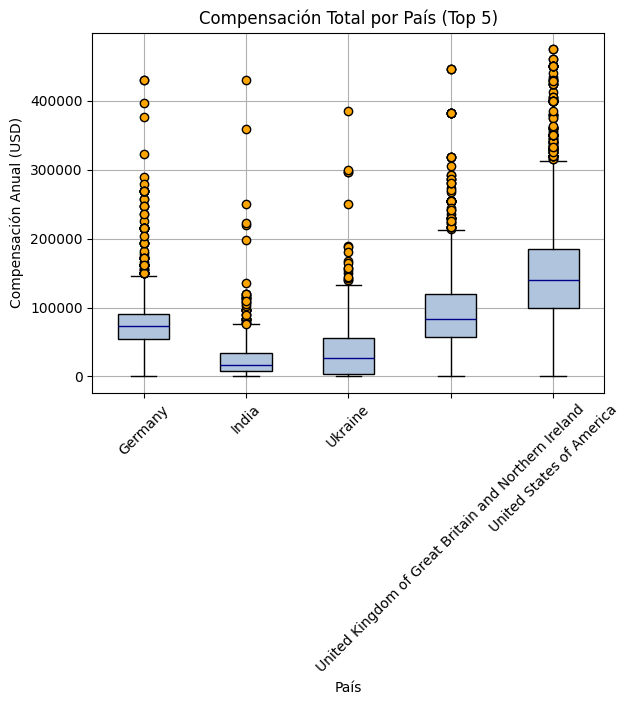

In [16]:
# Extraer columnas necesarias
query = "SELECT Country, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Obtener los 5 países con más encuestados
top5_paises = df['Country'].value_counts().head(5).index.tolist()

# Filtrar solo esos países
df_top5 = df[df['Country'].isin(top5_paises)]

# Filtrar compensaciones extremas para evitar distorsión visual
df_top5 = df_top5[df_top5['ConvertedCompYearly'] < df_top5['ConvertedCompYearly'].quantile(0.99)]

# Graficar el box plot
plt.figure(figsize=(12,6))
df_top5.boxplot(column='ConvertedCompYearly', by='Country', grid=False, patch_artist=True,
                boxprops=dict(facecolor='lightsteelblue', color='black'),
                medianprops=dict(color='darkblue'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

plt.title('Compensación Total por País (Top 5)')
plt.suptitle('')
plt.xlabel('País')
plt.ylabel('Compensación Anual (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1200x600 with 0 Axes>

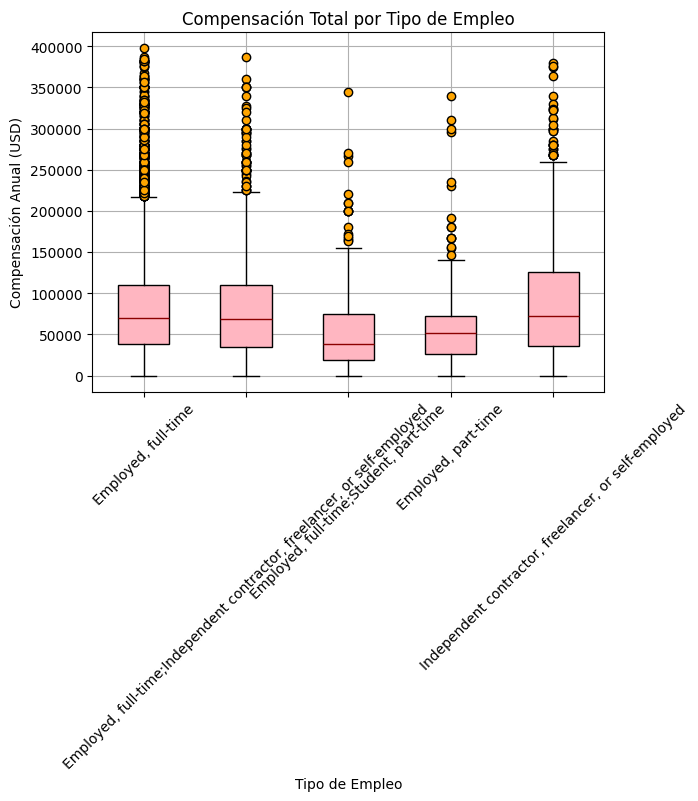

In [17]:
# Extraer columnas necesarias
query = "SELECT Employment, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Filtrar los tipos de empleo más comunes
tipos_empleo = df['Employment'].value_counts().head(5).index.tolist()
df = df[df['Employment'].isin(tipos_empleo)]

# Filtrar compensaciones extremas para evitar distorsión visual
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Graficar el box plot
plt.figure(figsize=(12,6))
df.boxplot(column='ConvertedCompYearly', by='Employment', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightpink', color='black'),
           medianprops=dict(color='darkred'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

plt.title('Compensación Total por Tipo de Empleo')
plt.suptitle('')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Compensación Anual (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

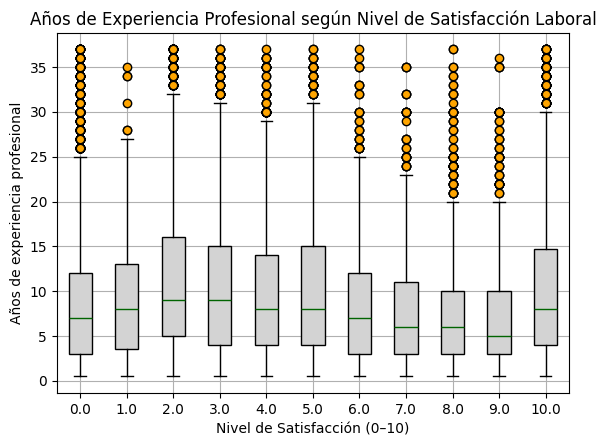

In [18]:
# Extraer columnas necesarias
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)
df = df.dropna()

# Convertir YearsCodePro a valores numéricos
def convertir_experiencia(valor):
    if valor == 'Less than 1 year':
        return 0.5
    elif valor == 'More than 50 years':
        return 51
    else:
        try:
            return float(valor)
        except:
            return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convertir_experiencia)
df = df.dropna(subset=['YearsCodePro'])

# Normalizar JobSatPoints_6 a escala 0–10
df['JobSatNorm'] = df['JobSatPoints_6'].apply(lambda x: x if x <= 10 else x / 10)
df['JobSatNorm'] = df['JobSatNorm'].round()

# Filtrar valores extremos de experiencia
df = df[df['YearsCodePro'] < df['YearsCodePro'].quantile(0.99)]

# Graficar el box plot
plt.figure(figsize=(10,6))
df.boxplot(column='YearsCodePro', by='JobSatNorm', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightgray', color='black'),
           medianprops=dict(color='darkgreen'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

plt.title('Años de Experiencia Profesional según Nivel de Satisfacción Laboral')
plt.suptitle('')
plt.xlabel('Nivel de Satisfacción (0–10)')
plt.ylabel('Años de experiencia profesional')
plt.grid(True)
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [19]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
